# The resource-consumer NP model with odeint

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The code below represents the dynamics
$$\frac{dN}{dt}=-k NP$$
$$\frac{dP}{dt}=k NP$$
The parameter $k$ is an input to the function

In [2]:
# function that returns the right hand side of the above equations
def model(state,t,k):
    N,P = state
    Ndot = -k * N * P
    Pdot =  k * N * P
    return np.array([Ndot,Pdot])

Set the initial conditions, the time axis and solve the ODE

In [3]:
# initial conditions
K = 0.1
N0 = 5.
P0 = 0.1
state0 = np.array([N0,P0])

# time points (days)
t = np.linspace(0,20,num=100)

# solve ODE using odeint (remember that args is a tuple)
y = odeint(model,state0,t,args=(K,))

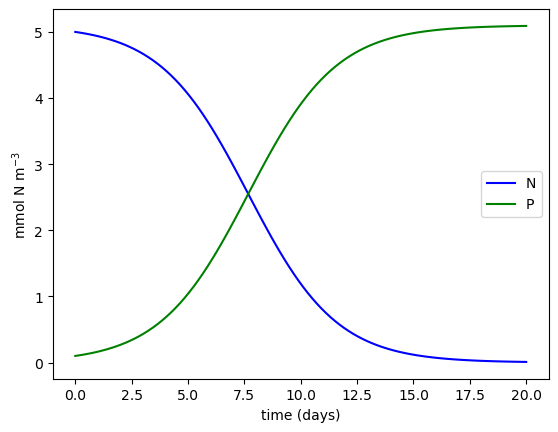

In [4]:
# plot the resulting time series
plt.plot(t,y[:,0],'b',label='N')
plt.plot(t,y[:,1],'g',label='P')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.legend()
plt.show()

# Exercise
2. Write a new model to simulate the nutrient-phytoplankton-detritus system (NPD). Include a detritus variable D that is produced from the mortality of phytoplankton and it is remineralized as a nutrient. This will involve adding 2 new parameters: the mortality rate (phytoplankton lysis) and the remineralization rate.

The model equations can be written using latex. Check the code in the inital cell above. Otherwise you can use the equation editor on Word or LibreOffice.

1. dn_dt = -k1 * N * P + k2 * D
2. dp_dt = k1 * N * P - k3 * P
3. dD_dt = k3 * P - k2 * D

3. Write the code to solve the new model using odeint and propose some reasonable values for the parameters that lead to a realistic solution

In [8]:
# Function that returns the right-hand side of the NPD model equations

def npd_model(state, t, k1, k2, k3):
    N, P, D = state
    Ndot = -k1 * N * P + k2 * D
    Pdot = k1 * N * P - k3 * P
    Ddot = k3 * P - k2 * D
    return np.array([Ndot, Pdot, Ddot])

In [9]:
# Set the initial conditions and parameters

k1 = 0.1  # Nutrient uptake rate by phytoplankton
k2 = 0.05  # Remineralization rate (detritus to nutrient)
k3 = 0.02  # Mortality rate (phytoplankton lysis)
N0 = 5.0  # Initial nutrient concentration
P0 = 0.1  # Initial phytoplankton concentration
D0 = 0.0  # Initial detritus concentration

state0 = np.array([N0, P0, D0])

In [10]:
# Create the time array and solve using the ODE solver

# Time points (days)
t = np.linspace(0, 20, num=100)

# Solve the NPD model ODE using odeint
y = odeint(npd_model, state0, t, args=(k1, k2, k3))

In [13]:
# Define the plot features:

labels = ['N', 'D', 'P']
colours = ['b', 'g','r']
xlabel = 'Time (days)'
ylabel ='Concentration (mmol m$^{-3}$)'
title = 'Nutrient-Phytoplankton-Detritus System'

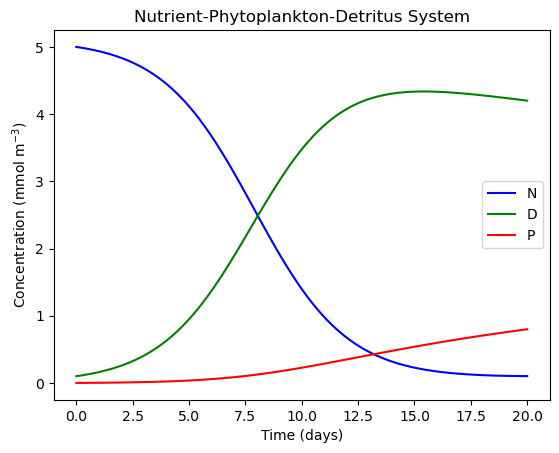

In [15]:
# Plot the resulting time series

for i in range(3):
    plt.plot(t, y[:, i], colours[i], label=labels[i])
    
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()